In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Trabalho Topicos IA1/merged-dfs.csv', sep=';')

In [ ]:
df

,Unnamed: 0,datetime,DATA,HORA UTC,15min,1h,4h,24h,96h,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",...,TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,0,2007-05-18 00:00:00,18-05-2007,00:00,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2007-05-18 01:00:00,18-05-2007,01:00,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2007-05-18 02:00:00,18-05-2007,02:00,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2007-05-18 03:00:00,18-05-2007,03:00,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2007-05-18 04:00:00,18-05-2007,04:00,0.0,0.0,0.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101832,101832,2018-12-31 19:00:00,31-12-2018,19:00,0.0,0.0,0.0,0.0,0.0,0.0,...,28.6,27.4,23.8,22.9,78.0,73.0,77.0,130.0,8.0,6.6
101833,101833,2018-12-31 20:00:00,31-12-2018,20:00,0.0,0.0,0.0,0.0,0.0,0.0,...,27.8,26.3,23.6,22.8,83.0,77.0,82.0,129.0,9.1,4.3
101834,101834,2018-12-31 21:00:00,31-12-2018,21:00,0.0,0.0,0.0,0.0,0.0,0.0,...,26.8,26.1,23.4,22.8,82.0,82.0,82.0,103.0,5.4,2.1
101835,101835,2018-12-31 22:00:00,31-12-2018,22:00,0.0,0.0,0.0,0.0,0.0,0.0,...,26.2,25.7,22.9,22.6,84.0,82.0,84.0,135.0,3.3,1.5


In [ ]:
df = df[df.columns.difference(['15min', '1h', '4h', '24h', '96h'])]

In [ ]:
df.shape

(101837, 21)

In [ ]:
rad = df['RADIACAO GLOBAL (KJ/m²)'].isnull().sum()
rad = rad[rad > 0]
print(rad / 101837)

[0.36072351]


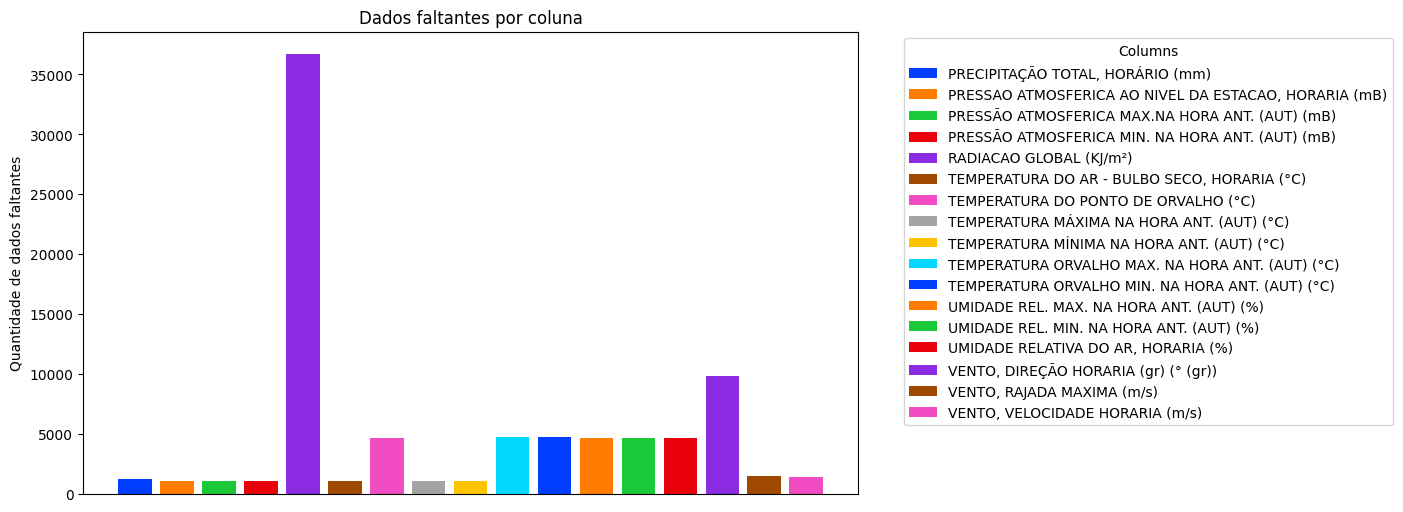

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

colors = sns.color_palette('bright', len(missing_values))

plt.figure(figsize=(10, 6))
bars = plt.bar(missing_values.index, missing_values.values, color=colors)

plt.xticks([])

plt.legend(bars, missing_values.index, title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylabel('Quantidade de dados faltantes')
plt.title('Dados faltantes por coluna')
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'datetime', 'DATA', 'HORA UTC', '15min', '1h', '4h',
       '24h', '96h', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (KJ/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
       'UMIDADE RELATIVA DO AR, HORARIA (%)',
       'VENTO, DIREÇÃO HORARIA (gr) (° (gr))', 'VENTO, RAJADA MAXIMA (m/s)',
       'VENTO, VELOCIDADE HORARIA (m/s)'],
      dtype='object')

In [ ]:
df[df['1h'].isna()]

,Unnamed: 0,datetime,DATA,HORA UTC,15min,1h,4h,24h,96h,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",...,TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
1283,1283,2007-07-10 11:00:00,10-07-2007,11:00,NaN,NaN,NaN,NaN,NaN,0.0,...,23.4,22.5,17.4,16.1,72.0,64.0,65.0,6.0,7.0,2.8
1284,1284,2007-07-10 12:00:00,10-07-2007,12:00,0.0,NaN,0.0,0.0,0.0,0.0,...,24.5,23.8,16.1,15.5,61.0,59.0,59.0,349.0,9.7,3.2
2152,2152,2007-08-15 16:00:00,15-08-2007,16:00,NaN,NaN,NaN,NaN,NaN,0.0,...,24.2,23.5,19.9,19.0,77.0,75.0,77.0,90.0,6.5,3.6
2153,2153,2007-08-15 17:00:00,15-08-2007,17:00,NaN,NaN,NaN,NaN,NaN,0.0,...,23.1,22.8,19.0,18.7,79.0,77.0,78.0,93.0,10.8,8.4
2154,2154,2007-08-15 18:00:00,15-08-2007,18:00,0.0,NaN,0.0,0.0,0.0,0.0,...,22.3,22.2,18.5,18.3,79.0,78.0,79.0,90.0,12.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101171,101171,2018-12-04 06:00:00,04-12-2018,06:00,NaN,NaN,NaN,NaN,NaN,0.0,...,21.9,21.5,19.1,18.8,85.0,83.0,85.0,98.0,3.3,0.9
101172,101172,2018-12-04 07:00:00,04-12-2018,07:00,NaN,NaN,NaN,NaN,NaN,0.0,...,21.8,21.6,19.3,19.0,86.0,85.0,85.0,90.0,2.4,1.0
101173,101173,2018-12-04 08:00:00,04-12-2018,08:00,NaN,NaN,NaN,NaN,NaN,0.0,...,21.7,21.5,19.2,18.9,86.0,85.0,86.0,95.0,3.0,2.1
101174,101174,2018-12-04 09:00:00,04-12-2018,09:00,NaN,NaN,NaN,NaN,NaN,0.0,...,23.9,21.6,20.4,19.1,86.0,81.0,81.0,102.0,2.8,1.1


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['1h'] = df['1h'].astype(float)

### classificação das chuvas (1h)
- x <= 5mm = fraca (verde)
- 5 < x <= 25 = moderada (amarelo)
- 25 < x <= 50 = forte (laranja)
- x > 50 = intensa (vermelho)

In [ ]:
def classify_rain(mm):
  if pd.isna(mm): return np.nan
  if mm <= 5: return 'Weak'
  elif 5 < mm <= 25: return 'Moderate'
  elif 25 < mm <= 50: return 'Heavy'
  elif mm > 50: return 'Intense'
  else: raise ValueError(f"Invalid precipitation value: {mm}.")

In [ ]:
colors = {'Weak':'green', 'Moderate':'blue', 'Heavy':'orange', 'Intense': 'red', np.nan: 'black'}

In [ ]:
df['preciptation_class'] = df['1h'].apply(classify_rain)

In [ ]:
df[['datetime', '1h', 'preciptation_class']]

,datetime,1h,preciptation_class
0,2007-05-18 00:00:00,0.0,Weak
1,2007-05-18 01:00:00,0.0,Weak
2,2007-05-18 02:00:00,0.0,Weak
3,2007-05-18 03:00:00,0.0,Weak
4,2007-05-18 04:00:00,0.0,Weak
...,...,...,...
101832,2018-12-31 19:00:00,0.0,Weak
101833,2018-12-31 20:00:00,0.0,Weak
101834,2018-12-31 21:00:00,0.0,Weak
101835,2018-12-31 22:00:00,0.0,Weak


In [ ]:
df_filtered = df.dropna(subset=['preciptation_class'])

In [ ]:
df_filtered[df_filtered['1h'].isna()]

,Unnamed: 0,datetime,DATA,HORA UTC,15min,1h,4h,24h,96h,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",...,TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",preciptation_class


In [ ]:
df_teste = df[df['1h'] > 25]
df_teste.shape

(27, 27)

### plot function

In [ ]:
def plot_timeseries(df, y, x='datetime', scatter_plot=False, year=None, month=None, day=None):

  df_aux = df.copy()

  fig, ax = plt.subplots(figsize=(12, 6))

  if year is not None:
      df_aux = df_aux[df_aux['datetime'].dt.year == year]

      ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))

  if month is not None:
      df_aux = df_aux[df_aux['datetime'].dt.month == month]
      ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d'))

  if day is not None:
      df_aux = df_aux[df_aux['datetime'].dt.day == day]
      ax.xaxis.set_major_formatter(dates.DateFormatter('%b %d %H:%Mh'))

  x = df_aux[x]
  y = df_aux[y]

  ax.set_xlabel("Date")
  ax.set_ylabel("Precipitation")
  ax.tick_params(axis='x', labelrotation = 45)

  plt.title(f'Copacabana - 1h Preciptation in {year} / {month} / {day}')

  if (scatter_plot): ax.scatter(x, y, s=10, c=df_aux['preciptation_class'].map(colors))
  else: ax.plot(x, y, linewidth=1.0)

In [ ]:
def print_df(df, col, year=None, month=None, day=None):
  df_aux = df.copy()

  if year is not None:
      df_aux = df_aux[df_aux['datetime'].dt.year == year]

  if month is not None:
      df_aux = df_aux[df_aux['datetime'].dt.month == month]

  if day is not None:
      df_aux = df_aux[df_aux['datetime'].dt.day == day]

  print(df_aux[['datetime', col]])

                  datetime   1h
101165 2018-12-04 00:00:00  NaN
101166 2018-12-04 01:00:00  NaN
101167 2018-12-04 02:00:00  NaN
101168 2018-12-04 03:00:00  NaN
101169 2018-12-04 04:00:00  NaN
101170 2018-12-04 05:00:00  NaN
101171 2018-12-04 06:00:00  NaN
101172 2018-12-04 07:00:00  NaN
101173 2018-12-04 08:00:00  NaN
101174 2018-12-04 09:00:00  NaN
101175 2018-12-04 10:00:00  NaN
101176 2018-12-04 11:00:00  0.0
101177 2018-12-04 12:00:00  0.0
101178 2018-12-04 13:00:00  0.0
101179 2018-12-04 14:00:00  0.0
101180 2018-12-04 15:00:00  0.0
101181 2018-12-04 16:00:00  0.0
101182 2018-12-04 17:00:00  0.0
101183 2018-12-04 18:00:00  0.0
101184 2018-12-04 19:00:00  0.0
101185 2018-12-04 20:00:00  0.0
101186 2018-12-04 21:00:00  0.0
101187 2018-12-04 22:00:00  0.0
101188 2018-12-04 23:00:00  0.0


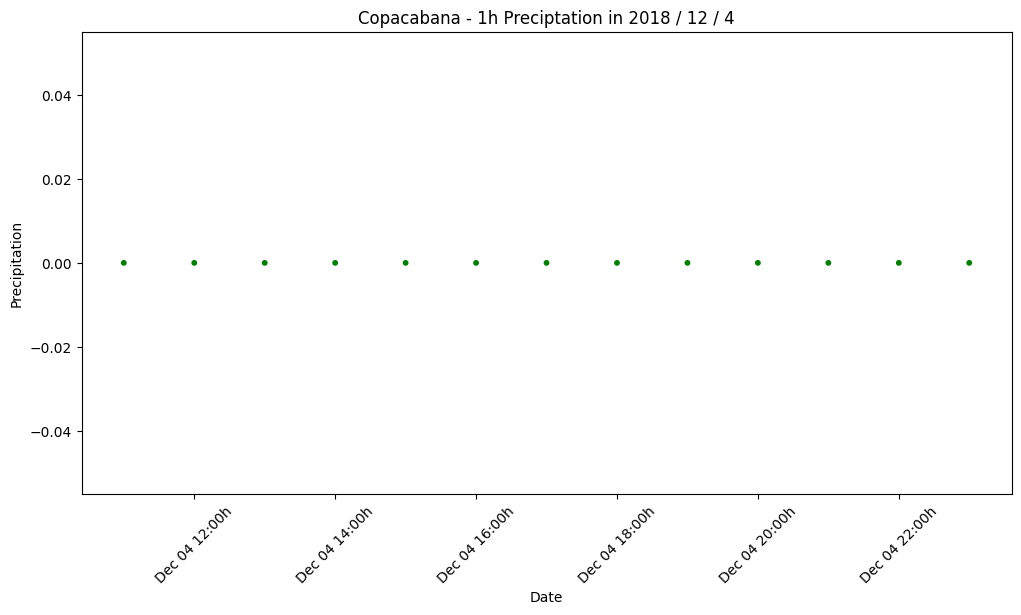

In [ ]:
plot_timeseries(df, y='1h', scatter_plot=True, year=2018, month=12, day=4)
print_df(df, col='1h' ,year=2018, month=12, day=4)
# plot_timeseries(df, y='1h', scatter_plot=True, year=2010, month=3)
# plot_timeseries(df, y='1h', scatter_plot=True, year=2007, month=8, day=29)

In [ ]:
df_interpolated = df.interpolate(method='linear')

In [ ]:
print_df(df_interpolated, col='1h' ,year=2018, month=12, day=4)

                  datetime   1h
101165 2018-12-04 00:00:00  0.0
101166 2018-12-04 01:00:00  0.0
101167 2018-12-04 02:00:00  0.0
101168 2018-12-04 03:00:00  0.0
101169 2018-12-04 04:00:00  0.0
101170 2018-12-04 05:00:00  0.0
101171 2018-12-04 06:00:00  0.0
101172 2018-12-04 07:00:00  0.0
101173 2018-12-04 08:00:00  0.0
101174 2018-12-04 09:00:00  0.0
101175 2018-12-04 10:00:00  0.0
101176 2018-12-04 11:00:00  0.0
101177 2018-12-04 12:00:00  0.0
101178 2018-12-04 13:00:00  0.0
101179 2018-12-04 14:00:00  0.0
101180 2018-12-04 15:00:00  0.0
101181 2018-12-04 16:00:00  0.0
101182 2018-12-04 17:00:00  0.0
101183 2018-12-04 18:00:00  0.0
101184 2018-12-04 19:00:00  0.0
101185 2018-12-04 20:00:00  0.0
101186 2018-12-04 21:00:00  0.0
101187 2018-12-04 22:00:00  0.0
101188 2018-12-04 23:00:00  0.0


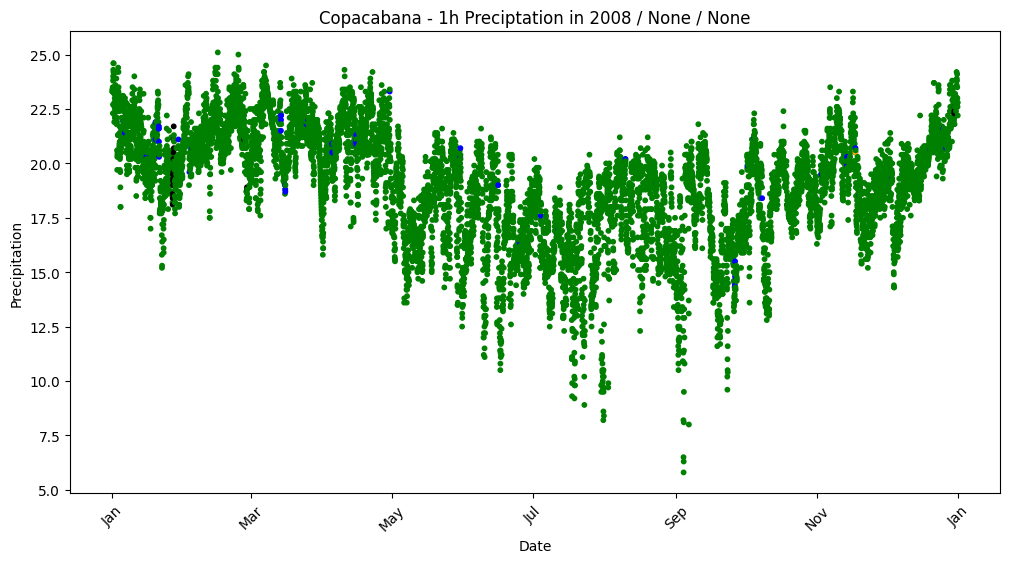

In [ ]:
plot_timeseries(df_interpolated, y='TEMPERATURA DO PONTO DE ORVALHO (°C)', scatter_plot=True, year=2008)

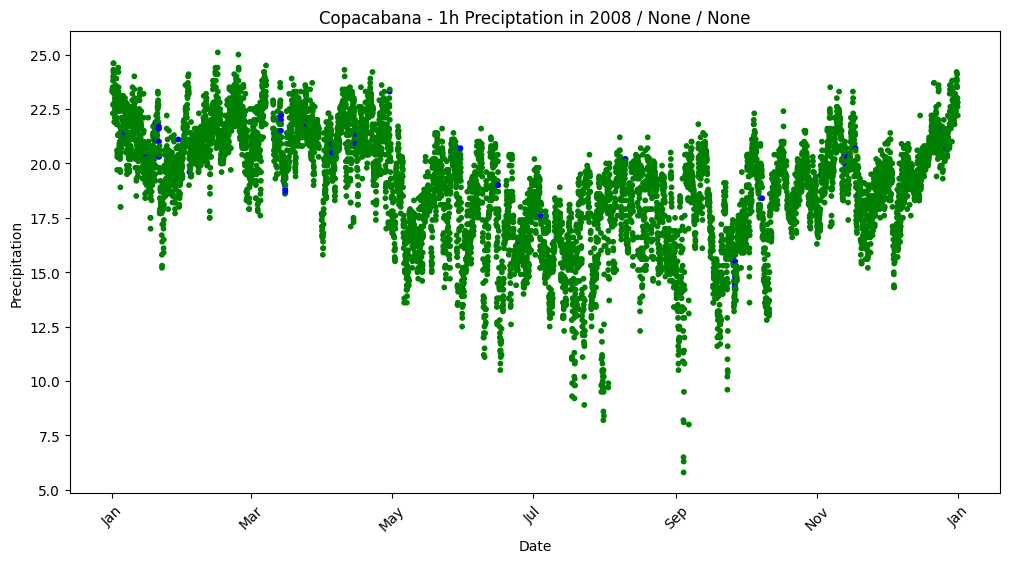

In [ ]:
plot_timeseries(df_filtered, y='TEMPERATURA DO PONTO DE ORVALHO (°C)', scatter_plot=True, year=2008)

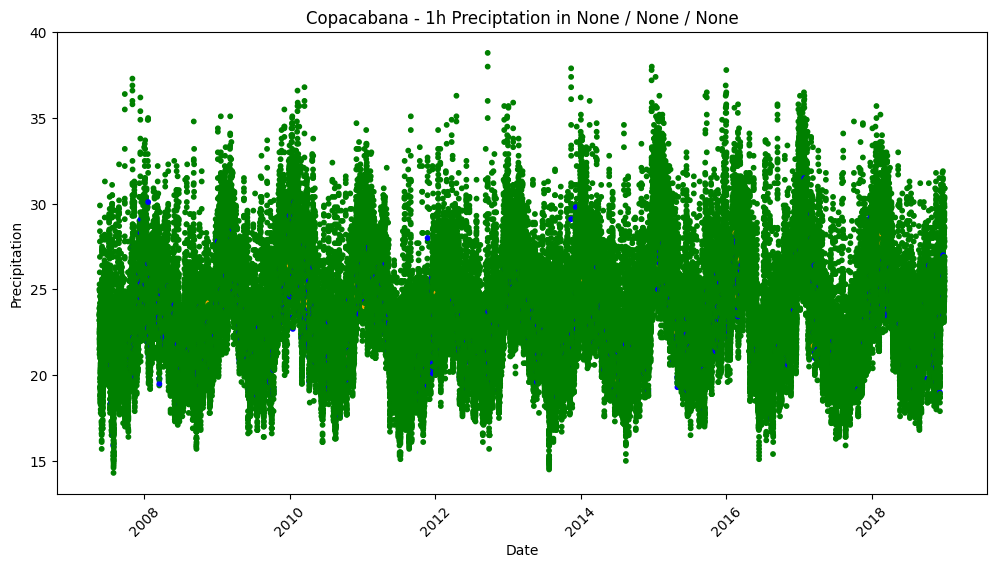

In [ ]:
plot_timeseries(df_filtered, y='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', scatter_plot=True)

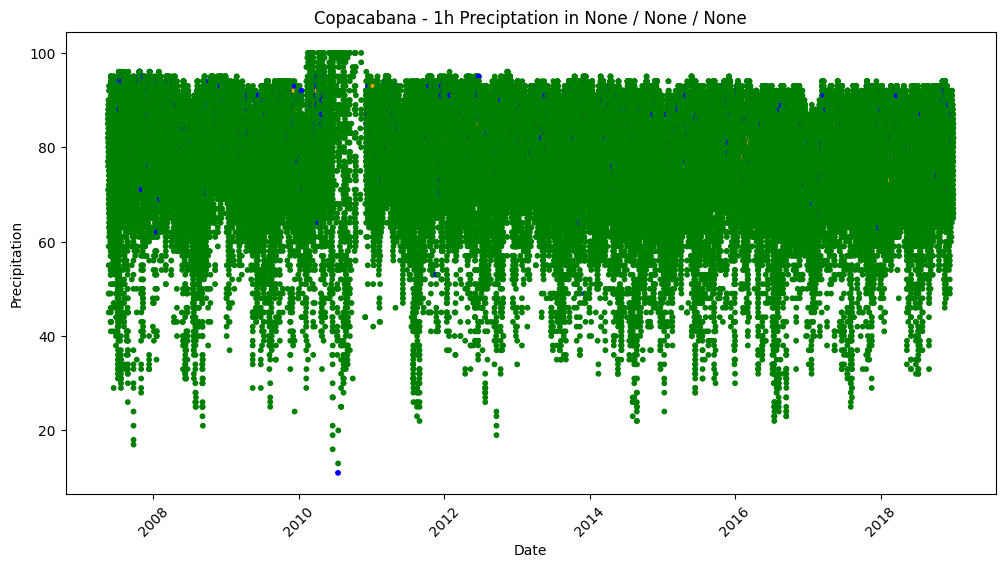

In [ ]:
plot_timeseries(df_filtered, y='UMIDADE RELATIVA DO AR, HORARIA (%)', scatter_plot=True)

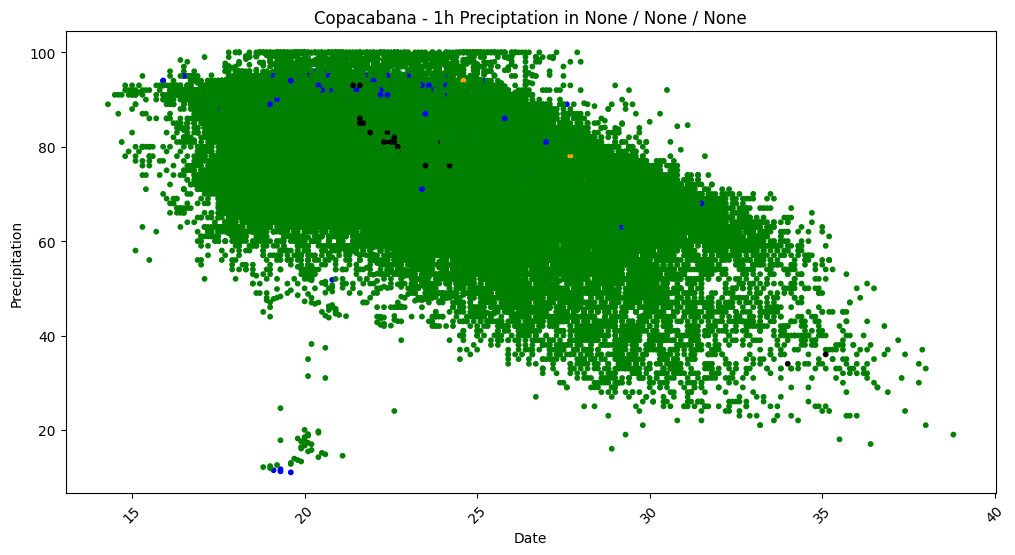

In [ ]:
plot_timeseries(df_interpolated, y='UMIDADE RELATIVA DO AR, HORARIA (%)', x='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', scatter_plot=True)

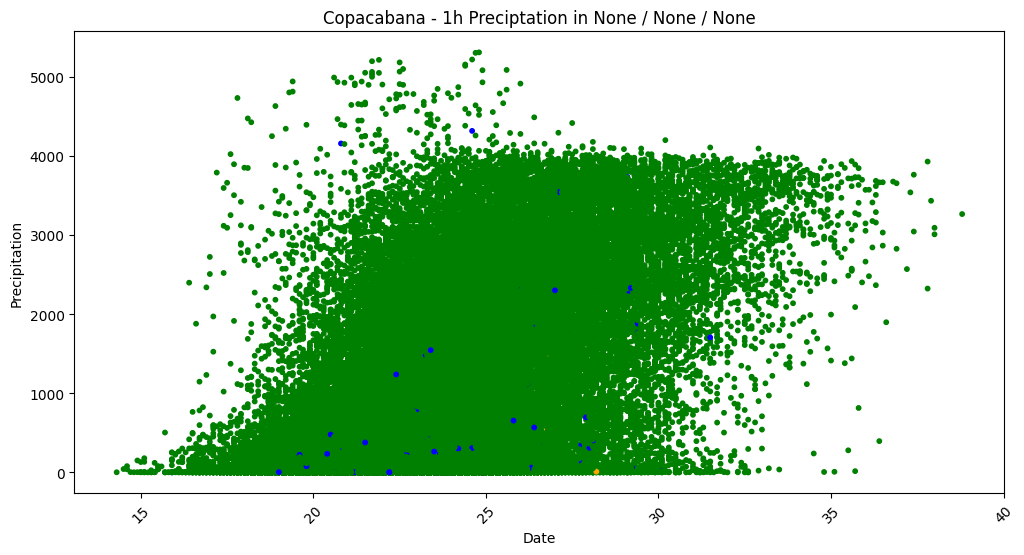

In [ ]:
plot_timeseries(df_filtered, y='RADIACAO GLOBAL (KJ/m²)', x='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', scatter_plot=True)